In [1]:
import pandas as pd

In [2]:
df = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)

In [3]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [39]:
df['headline'][0]

'former versace store clerk sues over secret black code for minority shoppers'

In [4]:
df = df[['headline','is_sarcastic']]
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


Text(0.5, 1.0, 'Sarcasm vs Non-sarcasm')

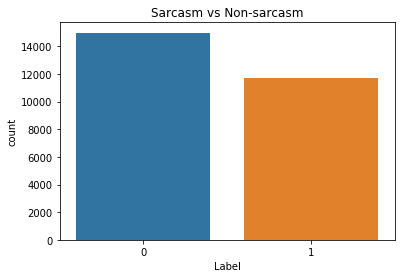

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.is_sarcastic)
plt.xlabel('Label')
plt.title('Sarcasm vs Non-sarcasm')

In [8]:
import re
df['headline'] = df['headline'].apply(lambda x: x.lower())
df['headline'] = df['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))


In [9]:
df['headline']

0        former versace store clerk sues over secret bl...
1        the roseanne revival catches up to our thorny ...
2        mom starting to fear sons web series closest t...
3        boehner just wants wife to listen not come up ...
4        jk rowling wishes snape happy birthday in the ...
                               ...                        
26704                  american politics in moral freefall
26705                               americas best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [11]:
for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')

In [12]:
row[0]

'gourmet gifts for the foodie 2014'

In [13]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['headline'].values)
X = tokenizer.texts_to_sequences(df['headline'].values)
X = pad_sequences(X)

In [14]:
Y = pd.get_dummies(df['is_sarcastic']).values

In [15]:
Y

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(17895, 29) (17895, 2)
(8814, 29) (8814, 2)


In [20]:
from keras.layers import Flatten, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers.core import Activation, Dropout, Dense
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D


In [21]:
lstm_out = 196
embed_dim = 128
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

W0129 12:23:17.602767  9952 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0129 12:23:17.618756  9952 deprecation.py:506] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0129 12:23:18.368040  9952 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0129 12:23:18.400005  9952 deprecation_wrapper.py:119] From c:

In [57]:
batch_size = 64
history = model.fit(X_train, Y_train, epochs =10,validation_split=0.2,batch_size = 64,verbose=2)

Train on 14316 samples, validate on 3579 samples
Epoch 1/10
 - 43s - loss: 0.1797 - acc: 0.9260 - val_loss: 0.1667 - val_acc: 0.9290
Epoch 2/10
 - 46s - loss: 0.1612 - acc: 0.9333 - val_loss: 0.1890 - val_acc: 0.9156
Epoch 3/10
 - 43s - loss: 0.1482 - acc: 0.9406 - val_loss: 0.2293 - val_acc: 0.9019
Epoch 4/10
 - 42s - loss: 0.1332 - acc: 0.9475 - val_loss: 0.2717 - val_acc: 0.8882
Epoch 5/10
 - 51s - loss: 0.1253 - acc: 0.9487 - val_loss: 0.3014 - val_acc: 0.8871
Epoch 6/10
 - 44s - loss: 0.1128 - acc: 0.9547 - val_loss: 0.3294 - val_acc: 0.8768
Epoch 7/10
 - 41s - loss: 0.1066 - acc: 0.9584 - val_loss: 0.3576 - val_acc: 0.8801
Epoch 8/10
 - 41s - loss: 0.0935 - acc: 0.9635 - val_loss: 0.3960 - val_acc: 0.8718
Epoch 9/10
 - 44s - loss: 0.0902 - acc: 0.9646 - val_loss: 0.4623 - val_acc: 0.8650
Epoch 10/10
 - 42s - loss: 0.0882 - acc: 0.9667 - val_loss: 0.4517 - val_acc: 0.8600


In [26]:
from  sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)


In [40]:
import numpy as np
headline = ['former versace store clerk sues over secret black code for minority shoppers']
headline = tokenizer.texts_to_sequences(headline)
headline = pad_sequences(headline, maxlen=29, dtype='int32', value=0)

sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Non-sarcastic")
elif (np.argmax(sentiment) == 1):
    print("Sarcasm")

Non-sarcastic


In [41]:
sentiment

array([0.9333451, 0.0666549], dtype=float32)

In [42]:
np.argmax(sentiment)

0

In [44]:
model.save_weights('sarcasmweights.h5')


In [45]:
model.save('sarcasm.h5')

In [46]:
import pickle
pkl_file = 'Tokenizer_sarcasm'
with open(pkl_file,'wb') as f:
    pickle.dump(tokenizer,f)
